In [73]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Baixando dados



In [51]:
# Descomprimindo



In [52]:
# Criando lista de nomes dos emails


ham_dir = '../raw_data/easy_ham/'
spam_dir = '../raw_data/spam/'

ham_email_names = []
spam_email_names = []

for email_name in sorted(os.listdir(ham_dir)):
    ham_email_names.append(email_name)
    
for email_name in sorted(os.listdir(spam_dir)):
    spam_email_names.append(email_name)

In [53]:
# Checando tamanho das instâncias de spam e ham

len(ham_email_names), len(spam_email_names)

(2500, 500)

In [54]:
# Carregando hams como messages

import email
import email.policy

email_policy = email.policy.default
parser = email.parser.BytesParser(policy=email_policy)

ham_emails_messages = []

for i in range(len(ham_email_names)):
    with open(ham_dir + ham_email_names[i], 'rb') as f: # rb serve para ler como bytes, sem decodificar
        email_file = parser.parse(f)
    ham_emails_messages.append(email_file) # strip remove espaços iniciais e finais
    
# Carregando spams como messages

spam_emails_messages = []

for i in range(len(spam_email_names)):
    with open(spam_dir + spam_email_names[i], 'rb') as f:
        email_file = parser.parse(f)
    spam_emails_messages.append(email_file)

In [55]:
# Como algumas mensagens são multipart, temos que fazer uma função para parsear

def get_email_structure(email):
    if isinstance(email, str): # Checando se já temos um email como texto
        return email
    
    payload = email.get_payload()
    
    if isinstance(payload, list):
        x = ", ".join([get_email_structure(sub_email) for sub_email in payload]) # Iterando sob as partes
        return f'multipart({x})'
    else:
        return email.get_content_type()
    
    
print(get_email_structure(ham_emails_messages[13])) # Testando em um email multipart
print(get_email_structure(ham_emails_messages[0])) # Testando em um email comum

multipart(text/plain, application/pgp-signature)
text/plain


    Essa próxima seção será movida para EDA

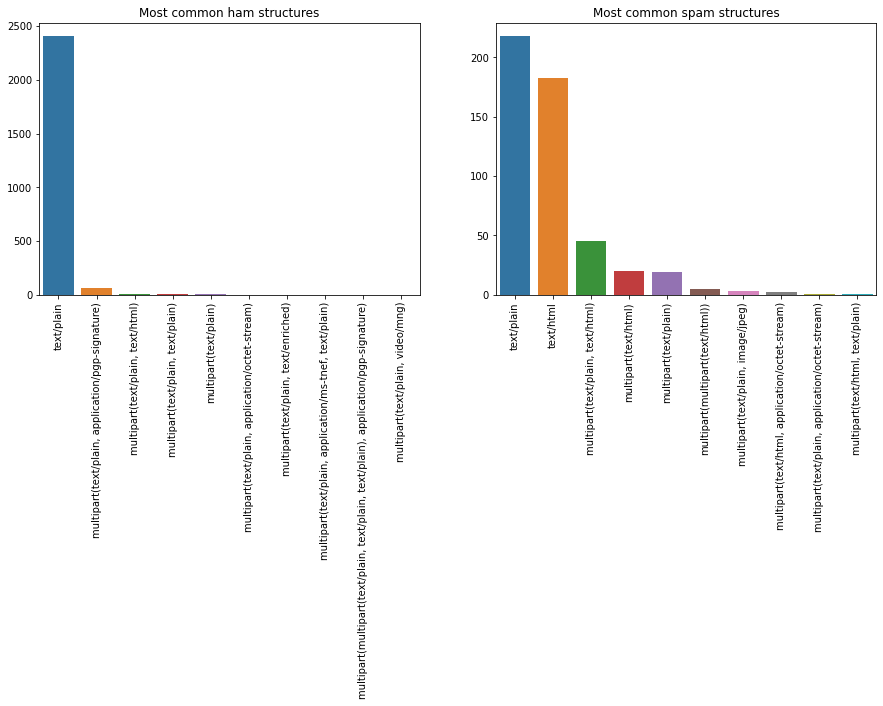

In [85]:
# Contando os tipos de emails

from collections import Counter

def structure_counter(emails):
    counter = Counter()
    
    for e in emails:
        structure = get_email_structure(e)
        counter[structure] += 1
    return counter

ham_strucutures = structure_counter(ham_emails_messages).most_common() # Talvez seja melhor utilizar dataframes
spam_strucutures = structure_counter(spam_emails_messages).most_common()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plot = sns.barplot(x=[ham_strucutures[i][0] for i in range(10)], y=[ham_strucutures[i][1] for i in range(10)])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title('Most common ham structures')

plt.subplot(1,2,2)
plot = sns.barplot(x=[spam_strucutures[i][0] for i in range(10)], y=[spam_strucutures[i][1] for i in range(10)])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title('Most common spam structures')

plt.show()